# Tarea 7. Estimación del riesgo sistemático ($\beta$).

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Separation_theorem_of_MPT.svg/2000px-Separation_theorem_of_MPT.svg.png" width="400px" height="400px" />

**Resumen.**
> En esta tarea aplicarás la técnica aprendida en clase para la estimación del coeficiente de riesgo sistemático $\beta$, el cual es primordial en el modelo de valoración de activos en equilibrio CAPM.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea7_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea7_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Selección de activos (10 puntos)

Seleccionar cinco (5) activos de su preferencia del S&P500 y enunciarlos en una celda en formato Markdown.

1. Microsoft (MSFT)
2. Amazon (AMZN)
3. Meta (META)
4. Google (GOOGL)
5. Tesla (TSLA)

## 2. Descarga de datos (10 puntos)

Descargar los precios mensuales ajustados en el cierre para los activos elegidos y el índice S&P 500 (^GSPC).

1. Graficar los precios (5 puntos).
2. Graficar los rendimientos (5 puntos).

In [1]:
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

yf.pdr_override()

In [2]:
def get_adj_closes(tickers,
                   start_date=None,
                   end_date=None,
                   interval="1d"
                  ):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.get_data_yahoo(
        tickers=tickers,
        start=start_date,
        end=end_date,
        interval=interval
    )
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [3]:
tickers = ["MSFT","AMZN","META","GOOGL","TSLA", "^GSPC"]
start = "2018-04-01"

In [4]:
closes = get_adj_closes(tickers, start_date=start, interval="1mo")

[*********************100%***********************]  6 of 6 completed


In [5]:
closes

,AMZN,GOOGL,META,MSFT,TSLA,^GSPC
Date,,,,,,
2018-04-01,78.306503,50.929001,172.000000,88.261810,19.593332,2648.050049
2018-05-01,81.481003,55.000000,191.779999,93.282669,18.982000,2705.270020
2018-06-01,84.989998,56.459499,194.320007,93.468994,22.863333,2718.370117
2018-07-01,88.872002,61.361000,172.580002,100.549568,19.875999,2816.290039
2018-08-01,100.635498,61.590000,175.729996,106.473724,20.110666,2901.520020
...,...,...,...,...,...,...
2022-12-01,84.000000,88.230003,120.339996,239.220825,123.180000,3839.500000
2023-01-01,103.129997,98.839996,148.970001,247.190857,173.220001,4076.600098
2023-02-01,94.230003,90.059998,174.940002,248.796829,205.710007,3970.149902


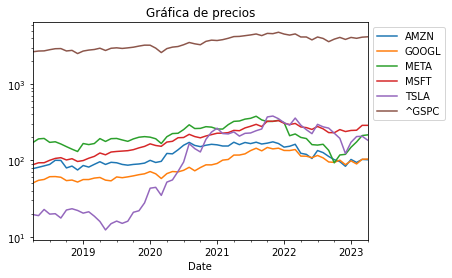

In [6]:
closes.plot()
plt.yscale('log')
plt.title("Gráfica de precios")
plt.legend(bbox_to_anchor = (1,1), loc = "upper left")

In [7]:
# Obtener rendimientos mensuales
ret = closes.pct_change().dropna()

In [8]:
ret.head()

,AMZN,GOOGL,META,MSFT,TSLA,^GSPC
Date,,,,,,
2018-05-01,0.040539,0.079935,0.115000,0.056886,-0.031201,0.021608
2018-06-01,0.043065,0.026536,0.013244,0.001997,0.204474,0.004842
2018-07-01,0.045676,0.086814,-0.111877,0.075753,-0.130660,0.036022
2018-08-01,0.132364,0.003732,0.018252,0.058918,0.011807,0.030263
2018-09-01,-0.004824,-0.020068,-0.064132,0.022079,-0.122290,0.004294


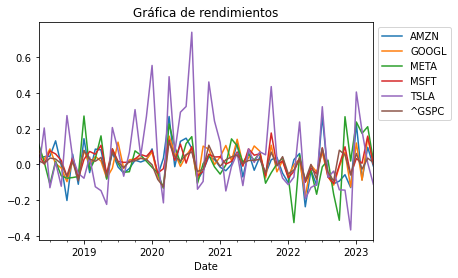

In [9]:
ret.plot()
plt.title("Gráfica de rendimientos")
plt.legend(bbox_to_anchor = (1,1), loc = "upper left")

## 3. Calculando los coeficientes $\beta$ (50 puntos)

Usando los datos de rendimientos mensuales calculados en el punto anterior:

1. Estime el valor del coeficiente de riesgo sistemático $\beta$ para cada uno de los activos seleccionados, con el método visto en clase (5 puntos por cada activo).
2. Compare su estimación de $\beta$ con el valor reportado en Yahoo! Finance mediante el error relativo: 
$$e_{relativo}=\frac{|\beta_{estimado}-\beta_{Yahoo!}|}{\beta_{Yahoo!}}.$$
Concluya de acuerdo al valor del error relativo obtenido (5 puntos por cada activo).

In [10]:
sigma = ret.cov()
sigma

,AMZN,GOOGL,META,MSFT,TSLA,^GSPC
AMZN,0.009807,0.004978,0.005785,0.004405,0.011405,0.003650
GOOGL,0.004978,0.005826,0.004689,0.003569,0.007253,0.003179
META,0.005785,0.004689,0.014286,0.004011,0.008490,0.003452
MSFT,0.004405,0.003569,0.004011,0.004050,0.006964,0.002673
TSLA,0.011405,0.007253,0.008490,0.006964,0.047869,0.005809
^GSPC,0.003650,0.003179,0.003452,0.002673,0.005809,0.002891


In [11]:
# Beta de cada activo con el proceso de clase
# Amazon
beta_amzn = sigma.loc["AMZN", "^GSPC"] / sigma.loc["^GSPC", "^GSPC"]
# Google
beta_googl = sigma.loc["GOOGL", "^GSPC"] / sigma.loc["^GSPC", "^GSPC"]
# Meta
beta_meta = sigma.loc["META", "^GSPC"] / sigma.loc["^GSPC", "^GSPC"]
# Microsoft
beta_msft = sigma.loc["MSFT", "^GSPC"] / sigma.loc["^GSPC", "^GSPC"]
# Tesla
beta_tsla = sigma.loc["TSLA", "^GSPC"] / sigma.loc["^GSPC", "^GSPC"]

beta_amzn, beta_googl, beta_meta, beta_msft, beta_tsla

(1.2627735232459538,
 1.0997601164126276,
 1.1943596513950065,
 0.9248211160961518,
 2.0096480310316527)

In [15]:
# Betas en Yahoo

# Instalar la última versión de yfinance 
# para el funcionamiento de yfinance.Ticker().info 

## Instalación: "conda install -c conda-forge yfinance" en Anaconda prompt
def get_beta(tkr):
    ticker = yf.Ticker(tkr)
    info = ticker.info
    return info.get("beta")

# Obtener betas desde Yahoo Finance
b_amzn = get_beta("AMZN")
b_googl = get_beta("GOOGL")
b_meta = get_beta("META")
b_msft = get_beta("MSFT")
b_tsla = get_beta("TSLA")


#Obtener los errores
def get_error(b_estimada,b_yahoo):
    return (abs(b_estimada - b_yahoo)/b_yahoo)

error_amzn = get_error(beta_amzn, b_amzn)
error_googl = get_error(beta_googl, b_googl)
error_meta = get_error(beta_meta, b_meta)
error_msft = get_error(beta_msft, b_msft)
error_tsla = get_error(beta_tsla, b_tsla)

In [16]:
errores = pd.DataFrame(data = {
    'Beta estimada': [beta_amzn, beta_googl, beta_meta, beta_msft, beta_tsla],
    'Beta Yahoo': [b_amzn, b_googl, b_meta, b_msft, b_tsla],
    'Error relativo':[error_amzn, error_googl, error_meta, error_msft, error_tsla]
},
index = ['AMZN', 'GOOGL', 'META', 'MSFT', 'TSLA'] )

errores

,Beta estimada,Beta Yahoo,Error relativo
AMZN,1.262774,1.262975,0.000160
GOOGL,1.099760,1.099653,0.000097
META,1.194360,1.194463,0.000087
MSFT,0.924821,0.929757,0.005309
TSLA,2.009648,2.012110,0.001224


**Conclusión general**

En todos los activos al obtener el error relativo, nos podemos dar cuenta que nuestra estimación  de la beta es correcta, ya que el valor del error es muy pequeño.

## 4. Gráfico y conclusiones (30 puntos)

1. Grafique cada uno de los activos en el espacio de $E[r]$ (eje $y$) vs. $\beta$ (eje $x$) (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. De la ecuación obtenida, identifique el valor de la tasa libre de riesgo $r_f$, y el valor del rendimiento esperado del portafolio de mercado $E[r_M]$. Compare este último con el rendimiento esperado del índice S&P500 (10 puntos).

In [21]:
from sklearn.linear_model import LinearRegression

In [27]:
data = pd.DataFrame(index = ['Media', 'Beta'], columns = ['AMZN', 'GOOGL', 'META', 'MSFT', 'TSLA', '^GSPC'])
                    
data.loc['Media'] = ret.mean()*12 #Rendimiento anual
data.loc['Beta'] = [beta_amzn, beta_googl, beta_meta, beta_msft, beta_tsla, 1]

data

,AMZN,GOOGL,META,MSFT,TSLA,^GSPC
Media,0.110492,0.179223,0.132594,0.26256,0.704388,0.107643
Beta,1.262774,1.09976,1.19436,0.924821,2.009648,1


In [28]:
model = LinearRegression()
model.fit(
    X = data.loc["Beta"].values.reshape(-1,1),
    y = data.loc["Media"].values)

b = [model.intercept_, model.coef_[0]]
print("Ecuación: {} + {} vol".format(b[0], b[1]))

Ecuación: -0.3853162487887112 + 0.5084250595171191 vol


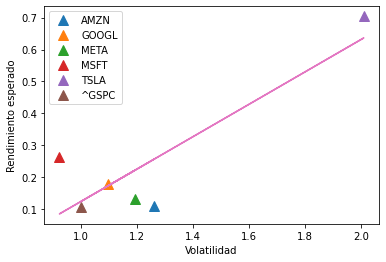

In [31]:
for i in range(len(data.axes[1])):
    plt.plot(data.iloc[1, i], data.iloc[0, i], "^", ms=10, label=data.columns[i])
    
plt.plot(data.iloc[1].values, model.predict(data.iloc[1].values.reshape([-1, 1])))

plt.xlabel("Volatilidad")
plt.ylabel("Rendimiento esperado")
plt.legend()

In [44]:
print("Ecuación: {} + {} vol".format(b[0], b[1]))
print("Tasa libre de riesgo: {}%".format(round(b[0]*100,2)))
print("Rendimiento esperando SP500: {}%".format(round(data.iloc[0, -1]*100, 2)))
print("Rendimiento esperado del portafolio de mercado E[rM]: {}%".format(round((b[0]+b[1])*100, 2)))

Ecuación: -0.3853162487887112 + 0.5084250595171191 vol
Tasa libre de riesgo: -38.53%
Rendimiento esperando SP500: 10.76%
Rendimiento esperado del portafolio de mercado E[rM]: 12.31%


Suponiendo un mercado con los activos utilizados en este ejercicio, este tendría una tasa libre de riesgo de -38.53%.

El rendimiento esperado de nuestro portafolio es mayor que el rendimiento esperado del índice por sí solo.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>